In [15]:
#Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### I - Virat Kohli Dataset

In [2]:
df = pd.read_csv("virat.csv")

In [3]:
df.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,18-Aug-08
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,20-Aug-08
2,25,40,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),24-Aug-08
3,54,87,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),27-Aug-08
4,31,45,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),29-Aug-08


#### Spread in Runs
Question 1: Analyse the spread of Runs scored by Virat in all his matches and report the difference between the scores at the 50th percentile and the 25th percentile respectively.

    a)16.5
    b)22.5
    c)26.5
    d)32.5



In [12]:
## Your code here
df['Runs_num'] = df['Runs'].apply(lambda x: int(str(x).replace('*', '')))
df.Runs_num.describe()

count    132.000000
mean      46.848485
std       41.994635
min        0.000000
25%       10.000000
50%       32.500000
75%       80.250000
max      154.000000
Name: Runs, dtype: float64

#### Box Plots

Question 2: Plot a Box Plot to analyse the spread of Runs that Virat has scored. The upper fence in the box plot lies in which interval?

    a)100-120
    b)120-140
    c)140-160
    d)160-180


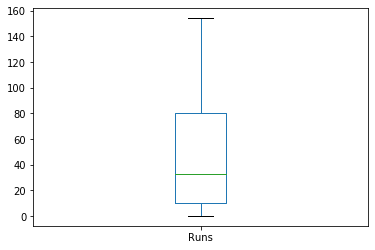

In [13]:
#Your code here
df.Runs_num.plot.box()

#### False Statement

Q3:Consider the following statements and choose the correct option

     I - Virat has played the maximum number of matches in 2011
     II - Virat has the highest run average in the year 2017
     III - Virat has the maximum score in a single match and the highest run average in the year 2016.

Which of the above statements is/are false?

    a)I and II
    b)I and III
    c)II
    d)III



In [17]:
## Your code here
df['Year'] = df['Start Date'].apply(lambda x: '20' + str(x)[-2:])
df['Year'].unique()
df.Year.value_counts()

array(['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017'], dtype=object)

2011    31
2013    23
2014    17
2010    16
2012    11
2016    10
2015    10
2009     6
2008     5
2017     3
Name: Year, dtype: int64

In [21]:
df.groupby('Year')['Runs_num'].agg('mean').sort_values(ascending=False)

Year
2016    73.900000
2017    61.666667
2014    58.529412
2013    47.826087
2010    45.375000
2011    42.000000
2012    40.363636
2009    38.333333
2008    31.800000
2015    30.400000
Name: Runs_num, dtype: float64

In [22]:
df.loc[df['Runs_num']==df['Runs_num'].max()]

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Runs_num,Year
126,154*,202,134,16,1,114.92,3,not out,2,v New Zealand,Mohali,23-Oct-16,154,2016


#### Maximum Frequency

Q4:Plot a histogram for the Mins column with 15 bins. Among the three ranges mentioned below, which one has the highest frequency?

A - [54.6,68)

B - [68,81.4)

C - [121.6,135)

    a)A - [54.6,68)
    b)B - [68,81.4)
    c)C - [121.6,135)
    d)All the bin ranges have the same frequency


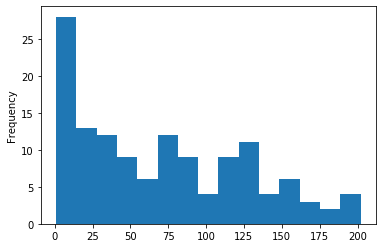

In [30]:
#Your code here
df.Mins.unique()
df_filt = df.loc[df['Mins']!='-']
df_filt['Mins'] = df_filt['Mins'].astype(int).copy()
df['Mins'] = df['Mins'].apply(lambda x: df_filt['Mins'].mean() if x == '-' else int(x))
df.Mins.plot.hist(bins=15);